# Практична робота 8
# Тема. Жадібні алгоритми. Наближене розв’язання екстремальних задач
# Мета: набути практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.

# 1.Код для візуалізаціїї графа

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Створюємо граф
G = nx.Graph()

# Додаємо ребра з зваженого графа
edges = [(1, 3, 10), (1, 4, 15), (1, 5, 20), (2, 3, 25), (2, 4, 30), (2, 5, 35)]
G.add_weighted_edges_from(edges)

# Малюємо граф
pos = nx.spring_layout(G)  # Розташування для візуалізації
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Зберігаємо графік
plt.savefig('graph.png')


# 2.Результат коду

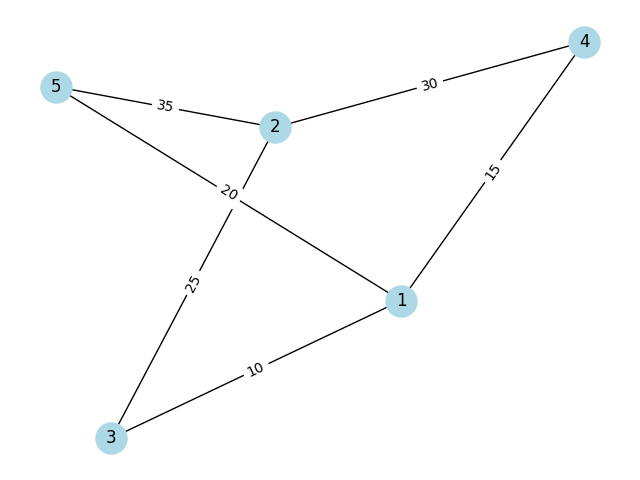

# 3.Код розв’язання методом «Груба сила»

In [ ]:
import networkx as nx
from itertools import permutations

# Створюємо граф
G = nx.Graph()
edges = [(1, 3, 10), (1, 4, 15), (1, 5, 20), (2, 3, 25), (2, 4, 30), (2, 5, 35)]
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# Константа "нескінченність"
INFINITY = pow(10, 20)

# Функція обчислення довжини маршруту
def get_path_length(path):
    path_length = 0
    for i, v1 in enumerate(path):
        v2 = path[(i + 1) % len(path)]  # Повернення до початку
        if not G.has_edge(v1, v2):
            return INFINITY
        path_length += G[v1][v2]["weight"]
    return path_length

# Генерація всіх перестановок з фіксованою стартовою вершиною
def node_permutations(G, init_node_index):
    nodes = list(G.nodes())
    init_node = nodes[init_node_index]
    remaining_nodes = nodes[:init_node_index] + nodes[init_node_index+1:]
    return [[init_node] + list(p) for p in permutations(remaining_nodes)]

# Основна функція: перебір усіх маршрутів
def TSP_BruteForce(G, init_node_index):
    min_path = None
    min_path_length = INFINITY
    for path in node_permutations(G, init_node_index):
        length = get_path_length(path)
        if length < min_path_length:
            min_path = path
            min_path_length = length
    return min_path + [min_path[0]], min_path_length  # додаємо повернення

# Запуск
path, cost = TSP_BruteForce(G, 0)  # стартова вершина – 1 (індекс 0)
print("Груба сила:")
print("Шлях:", path)
print("Вартість:", cost)

# 4.Результат коду

Шлях: [1, 3, 2, 4, 5, 1]
Загальна вартість: 1000085.0

# 5.Код розв’язання методом «Найближчий сусід»

In [ ]:
import networkx as nx

# Побудова графа
G = nx.Graph()
edges = [(1, 3, 10), (1, 4, 15), (1, 5, 20), (2, 3, 25), (2, 4, 30), (2, 5, 35)]
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# Доповнення графа до повного
nodes = list(G.nodes())
for i in nodes:
    for j in nodes:
        if i != j and not G.has_edge(i, j):
            G.add_edge(i, j, weight=1e6)

# Жадібний алгоритм
def tsp_nearest_neighbor(graph, start):
    path = [start]
    visited = set(path)
    total_cost = 0
    current = start

    while len(visited) < len(graph.nodes()):
        neighbors = [(n, graph[current][n]['weight']) for n in graph.neighbors(current) if n not in visited]
        if not neighbors:
            return None, float('inf')
        next_node, weight = min(neighbors, key=lambda x: x[1])
        path.append(next_node)
        visited.add(next_node)
        total_cost += weight
        current = next_node

    if graph.has_edge(current, start):
        total_cost += graph[current][start]['weight']
        path.append(start)
    else:
        return None, float('inf')

    return path, total_cost

# Виконання
path, cost = tsp_nearest_neighbor(G, start=1)
print("Найближчий сусід:")
print("Шлях:", path)
print("Загальна вартість:", cost)

# 6.Результат коду

Шлях: [1, 3, 2, 4, 5, 1]
Загальна вартість: 1000085.0

# 7.Асимптотика для обох алгоритмів

Асимптотична складність грубої сили:O(n!)
Асимптотична складність найближчого сусіда:O(n²)

# 8.Висновок:

In [ ]:
Набув практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.

## 9.Відповіді на контрольні питання:

1. Що таке жадібний алгоритм?

Це алгоритм, який на кожному кроці робить локально оптимальний вибір, сподіваючись, що це приведе до глобального оптимального рішення.

2. Які головні принципи роботи жадібних алгоритмів?

Головні принципи роботи жадібних алгоритмів:

    Локальний вибір на кожному етапі.
    
    Відсутність перегляду попередніх рішень.
    
    Оптимальність часткових рішень гарантує оптимальність загального.

3. Яка головна відмінність між жадібними алгоритмами та динамічним програмуванням?

Головна відмінність між жадібними алгоритмами та динамічним програмуванням: Жадібний алгоритм ухвалює рішення без повернення до попередніх станів, тоді як динамічне програмування розглядає всі можливі варіанти та використовує рекурсію з пам’яттю.

4. Наведіть приклади задач, які можна розв’язати за допомогою жадібних алгоритмів.

Приклади задач для жадібних алгоритмів:

    Задача про рюкзак (без обмеження на дроблення предметів).
    
    Алгоритм Дейкстри для пошуку найкоротших шляхів у графах.
    
    Оптимальне кодування Хаффмана.

5. Які можуть бути обмеження у використанні жадібних алгоритмів для розв'язання екстремальних задач

Обмеження жадібних алгоритмів:

    Вони не завжди дають глобально оптимальне рішення.
    
    Не підходять для задач із складними залежностями між етапами.
    
    Іноді потрібно додатковий аналіз, щоб довести коректність рішення.

6. Чому жадібні алгоритми часто використовуються для наближеного розв’язання екстремальних задач?

Вони працюють швидко, мають низьку складність та можуть дати прийнятний результат там, де точні методи надто затратні.